In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re, string,unicodedata
from termcolor import colored
from collections import Counter
from string import punctuation

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from nltk import pos_tag
from nltk.corpus import wordnet

In [3]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.layers import Bidirectional

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sajid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sajid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sajid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df_true_news = pd.read_csv("True.csv")
df_fake_news = pd.read_csv("Fake.csv")
GLOVE_EMBEDDING = "glove.twitter.27B.100d.txt"

In [7]:
df_true_news.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [8]:
df_true_news.tail()

title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  
21412  August 22, 2017   
21413  August 22, 2017   
21414  August 22, 2017   
21415  August 22, 2017   
21416  August 22, 2017

In [9]:
df_true_news.shape

(21417, 4)

In [10]:
df_true_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [11]:
df_true_news.duplicated().sum()

206

In [12]:
df_true_news = df_true_news.drop_duplicates()

In [13]:
df_true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
df_true_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
dtypes: object(4)
memory usage: 828.6+ KB


In [15]:
df_true_news.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [16]:
df_fake_news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0  December 31, 2017        NaN        NaN        NaN        NaN        NaN   
1  December 31, 2017        NaN        NaN        NaN        NaN        NaN   
2  December 30, 2017        NaN        NaN        NaN        NaN        NaN   
3  December 29, 2017        NaN        NaN        NaN        NaN        NaN   
4  December 25, 2017        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 162 Unnamed: 163 Unnamed: 164 Unnamed: 165  \
0        NaN  ...          NaN          NaN          NaN          NaN   
1        NaN  ...          NaN          NaN          NaN          NaN   
2        NaN  ...          NaN          NaN          NaN          NaN   
3        NaN  ...          NaN          NaN          NaN          NaN   
4        NaN  ...          NaN          NaN          NaN          NaN   

  Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169 Unnamed: 170  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 171  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 172 columns]

In [17]:
df_fake_news.tail()

title  \
23497  McPain: John McCain Furious That Iran Treated ...   
23498  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23499  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23500  How to Blow $700 Million: Al Jazeera America F...   
23501  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23497  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23498  21st Century Wire says It s a familiar theme. ...  Middle-east   
23499  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23500  21st Century Wire says Al Jazeera America will...  Middle-east   
23501  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
23497  January 16, 2016        NaN        NaN        NaN        NaN   
23498  January 16, 2016        NaN        NaN        NaN        NaN   
23499  January 15, 2016        NaN        NaN        NaN        NaN   
23500  January 14, 2016        NaN        NaN        NaN        NaN   
23501  January 12, 2016        NaN        NaN        NaN        NaN   

      Unnamed: 8 Unnamed: 9  ... Unnamed: 162 Unnamed: 163 Unnamed: 164  \
23497        NaN        NaN  ...          NaN          NaN          NaN   
23498        NaN        NaN  ...          NaN          NaN          NaN   
23499        NaN        NaN  ...          NaN          NaN          NaN   
23500        NaN        NaN  ...          NaN          NaN          NaN   
23501        NaN        NaN  ...          NaN          NaN          NaN   

      Unnamed: 165 Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169  \
23497          NaN          NaN          NaN          NaN          NaN   
23498          NaN          NaN          NaN          NaN          NaN   
23499          NaN          NaN          NaN          NaN          NaN   
23500          NaN          NaN          NaN          NaN          NaN   
23501          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 170 Unnamed: 171  
23497          NaN          NaN  
23498          NaN          NaN  
23499          NaN          NaN  
23500          NaN          NaN  
23501          NaN          NaN  

[5 rows x 172 columns]

In [18]:
df_fake_news.columns

Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)

In [19]:
df_fake_news.shape

(23502, 172)

In [20]:
df_fake_news.columns

Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)

In [21]:
df_fake_news = df_fake_news[['title','text','subject','date']]

In [22]:
df_fake_news.shape

(23502, 4)

In [23]:
df_fake_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [24]:
df_fake_news.duplicated().sum()

23

In [25]:
df_fake_news = df_fake_news.drop_duplicates()

In [26]:
df_fake_news.isnull().sum()

title       0
text        0
subject    11
date       11
dtype: int64

In [27]:
df_fake_news = df_fake_news.dropna(how='all')

In [28]:
df_fake_news.shape

(23479, 4)

In [29]:
df_fake_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23501
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23479 non-null  object
 1   text     23479 non-null  object
 2   subject  23468 non-null  object
 3   date     23468 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


In [30]:
df_fake_news.nunique()

title      17914
text       17466
subject       17
date        1692
dtype: int64

In [31]:
df_true_news["news_class"],df_fake_news["news_class"] = 1,0
news_after_make_concate = pd.concat([df_true_news, df_fake_news])

In [32]:
news_after_make_concate.shape

(44690, 5)

In [33]:
news_after_make_concate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44690 entries, 0 to 23501
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44690 non-null  object
 1   text        44690 non-null  object
 2   subject     44679 non-null  object
 3   date        44679 non-null  object
 4   news_class  44690 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [34]:
news_after_make_concate.isna().sum()

title          0
text           0
subject       11
date          11
news_class     0
dtype: int64

In [35]:
news_after_make_concate = news_after_make_concate.dropna(how='any')

In [36]:
news_after_make_concate.duplicated().sum()

0

In [37]:
news_after_make_concate['news_class'].unique()

array([1, 0], dtype=int64)

In [38]:
news_after_make_concate['news_class'].value_counts()

0    23468
1    21211
Name: news_class, dtype: int64

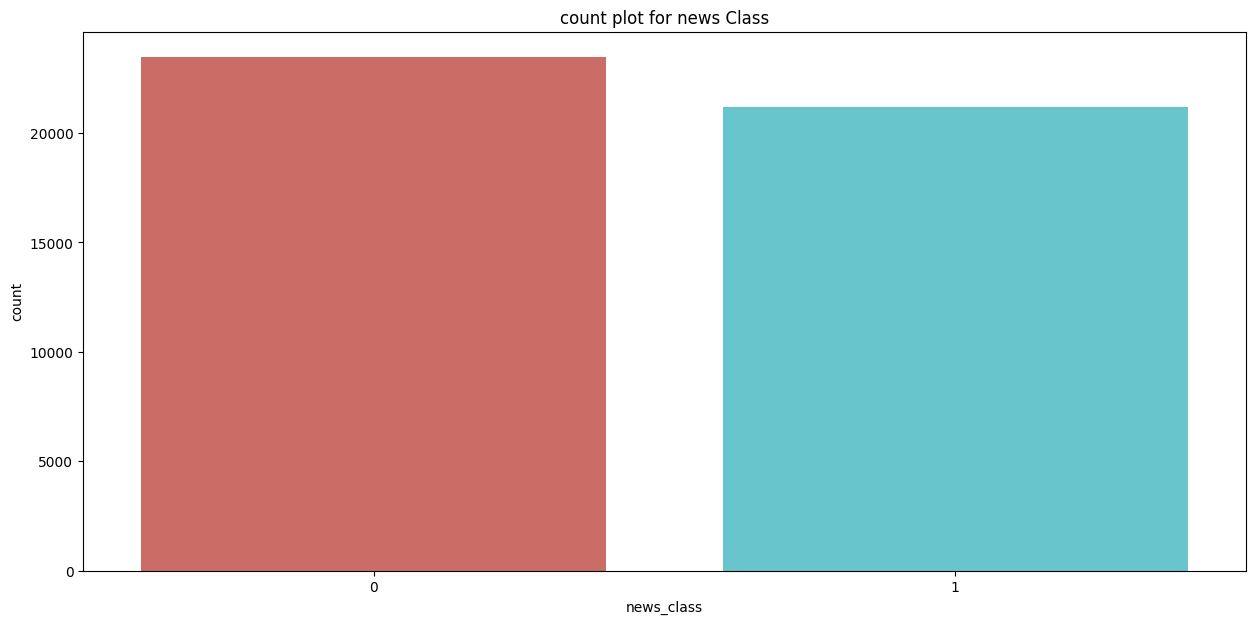

In [39]:
plt.figure(figsize=[15,7],)
plt.title('count plot for news Class')
sns.countplot(x= 'news_class', data = news_after_make_concate,palette ='hls')
plt.show()

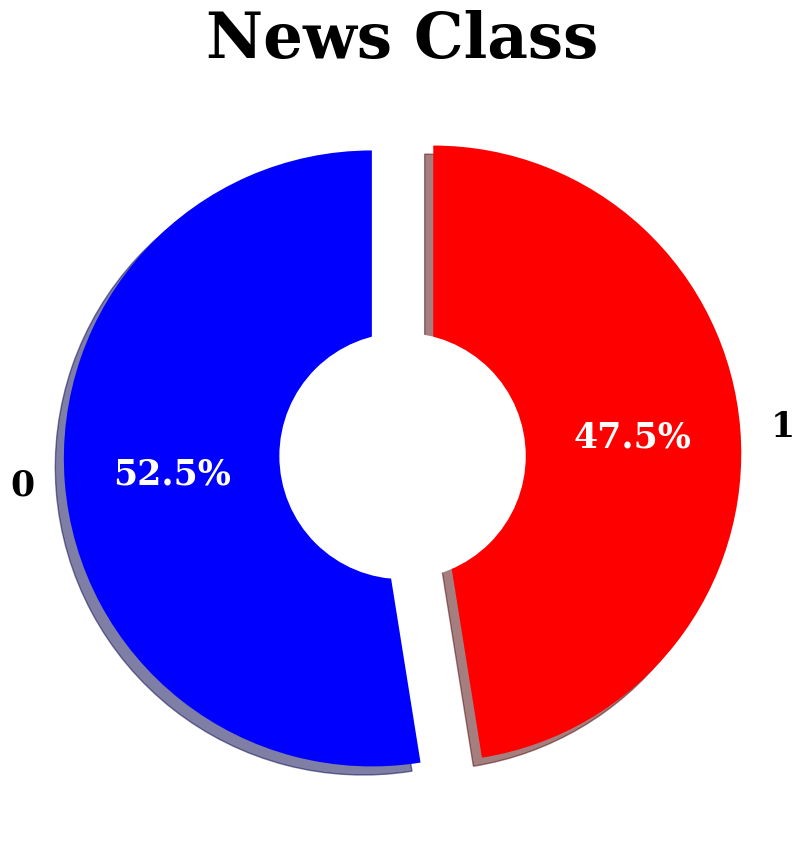

In [40]:
news_class_data = news_after_make_concate['news_class'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(news_class_data,
                               labels=news_class_data.index,
                               colors= ['blue', 'red'],
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               explode = (0.1, 0.1),
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('News Class', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [41]:
fig = px.pie(data_frame = news_after_make_concate, names = "news_class", hole = 0.4, title = "counts in news_class",
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [42]:
news_after_make_concate['subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'politics',
       ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict',
       ' high taxes',
       ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"',
       'Government News', 'left-news',
       ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists',
       'US_News', ' and so is Mr. Katzenbach',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014',
       ' state systems with outsized pretensions to power have rea

In [43]:
news_after_make_concate['subject'].value_counts()

politicsNews                                                                                                                                                                                                                                                                                    11220
worldnews                                                                                                                                                                                                                                                                                        9991
News                                                                                                                                                                                                                                                                                             9050
politics                                                                                                              

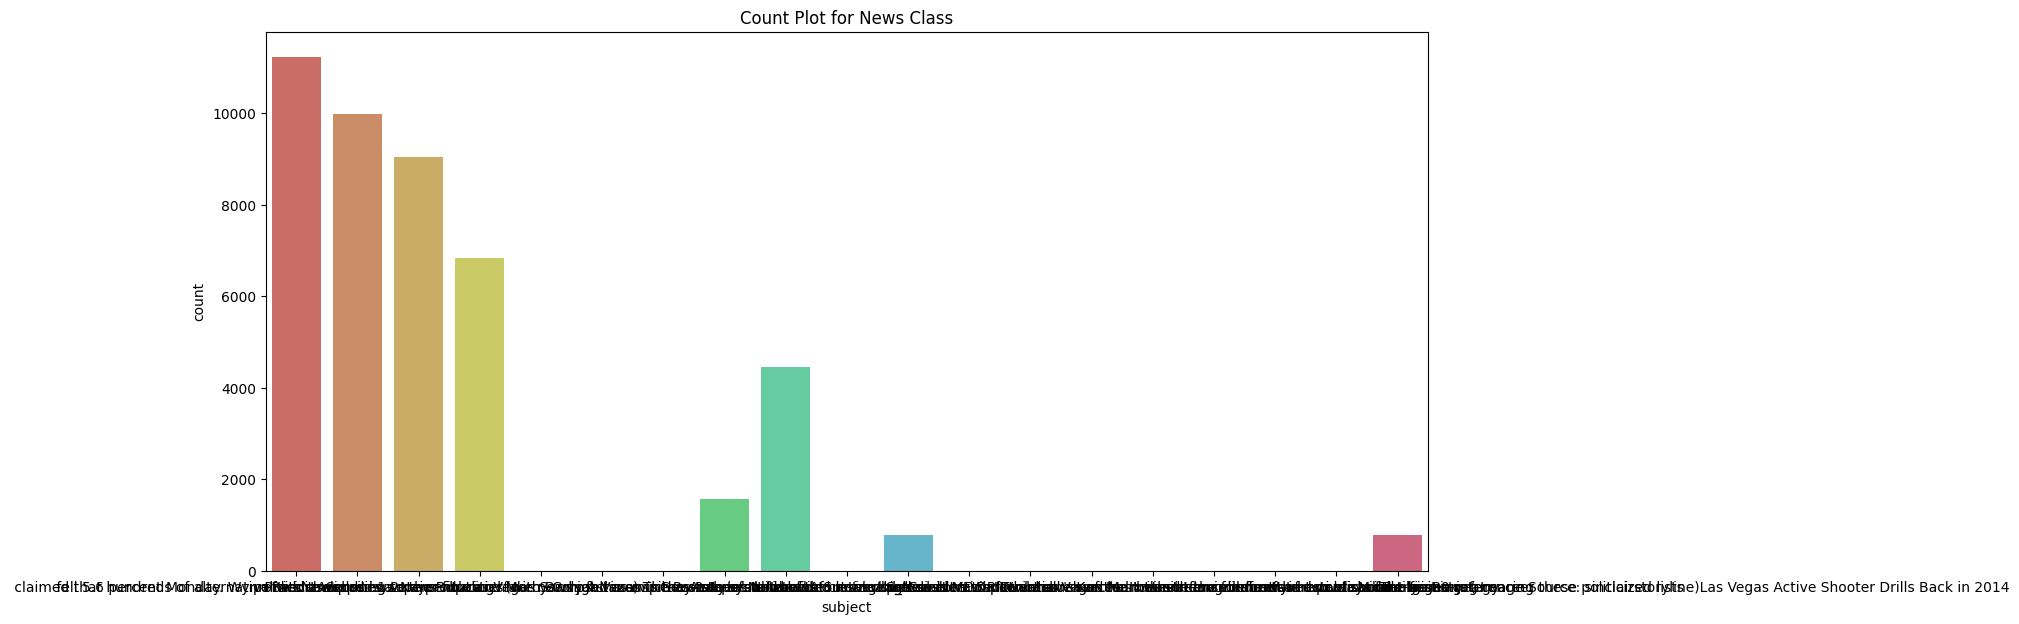

In [44]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for News Class')
sns.countplot(x = 'subject', data = news_after_make_concate, palette = 'hls')
plt.show()

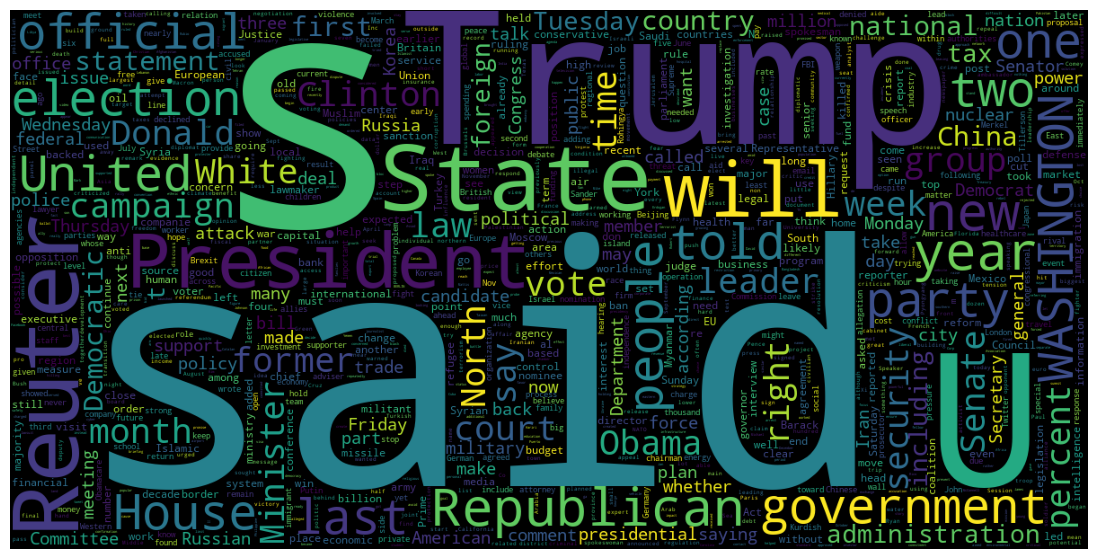

In [45]:
text = " ".join(i for i in df_true_news.text)

wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show()

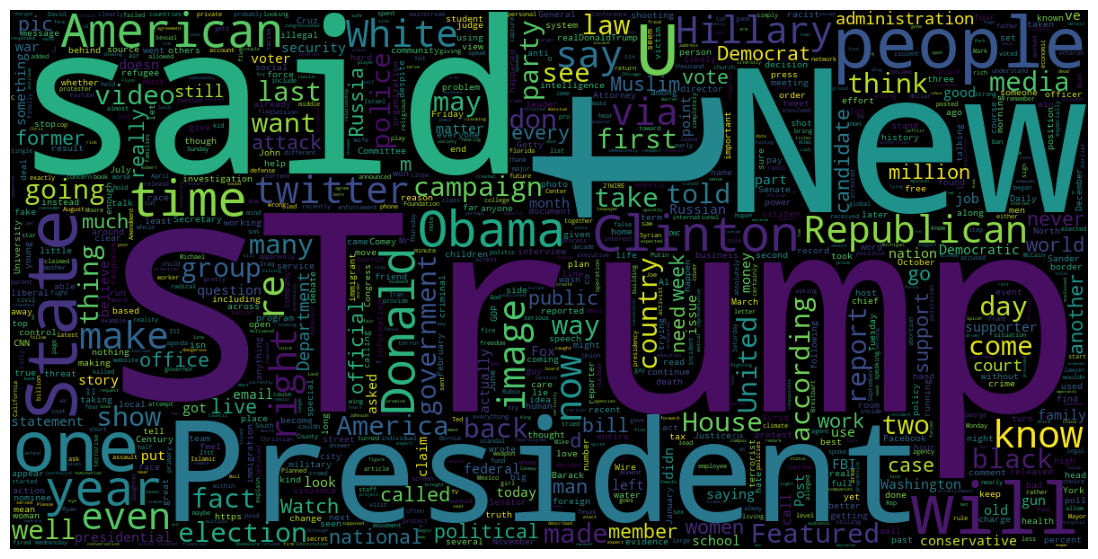

In [46]:
text = " ".join(i for i in df_fake_news.text)

wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show()

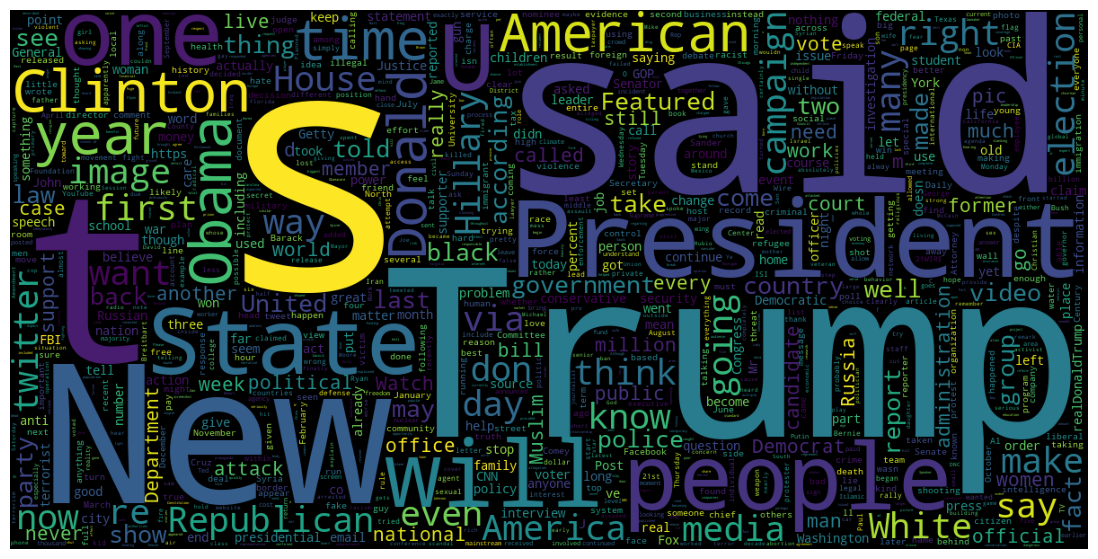

In [47]:
# Wordcloud for fake news
text = " ".join(i for i in df_fake_news.text)

wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show()

In [48]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [49]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news_after_make_concate['text']=news_after_make_concate['text'].apply(denoise_text)

In [50]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news_after_make_concate.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [51]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 100678,
 'said': 92157,
 'would': 53790,
 'U.S.': 45575,
 'people': 32725,
 'President': 32020,
 'also': 29807,
 'one': 28879,
 'Donald': 26883,
 'said.': 25925}

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

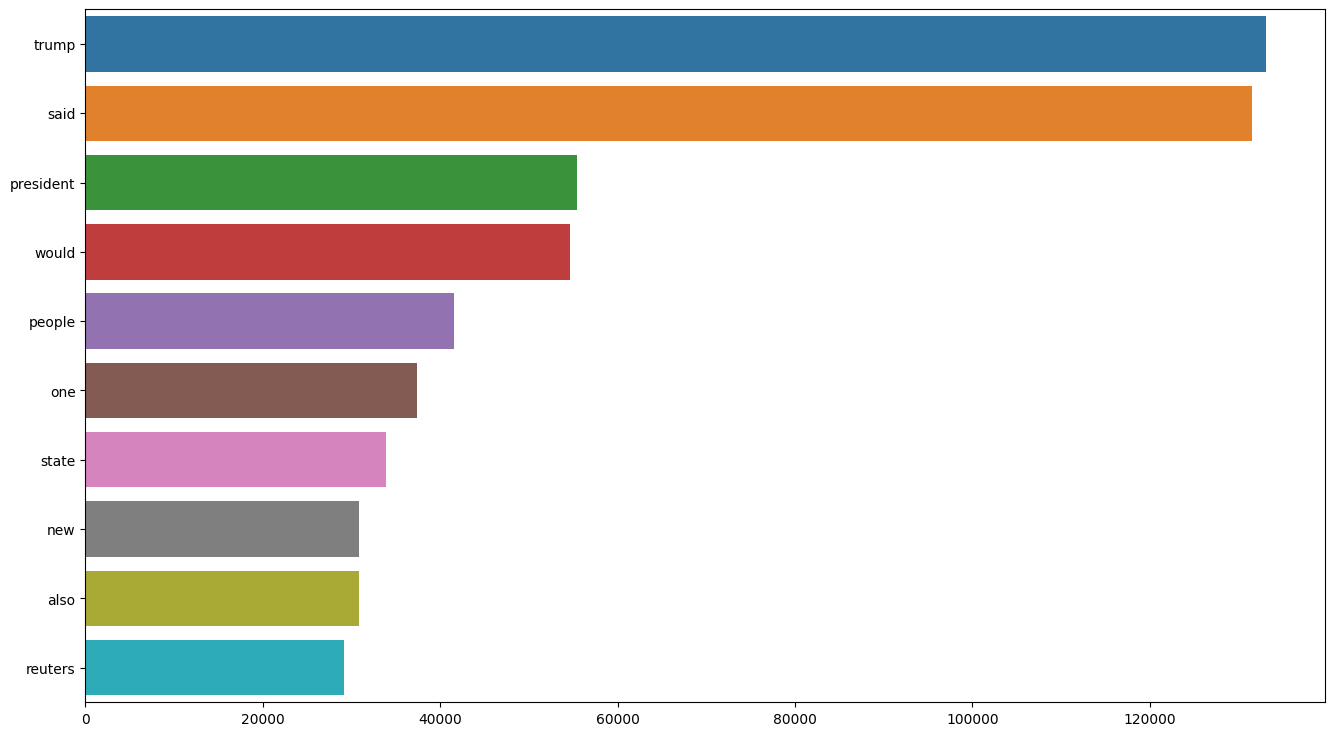

In [53]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news_after_make_concate.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))
plt.show()

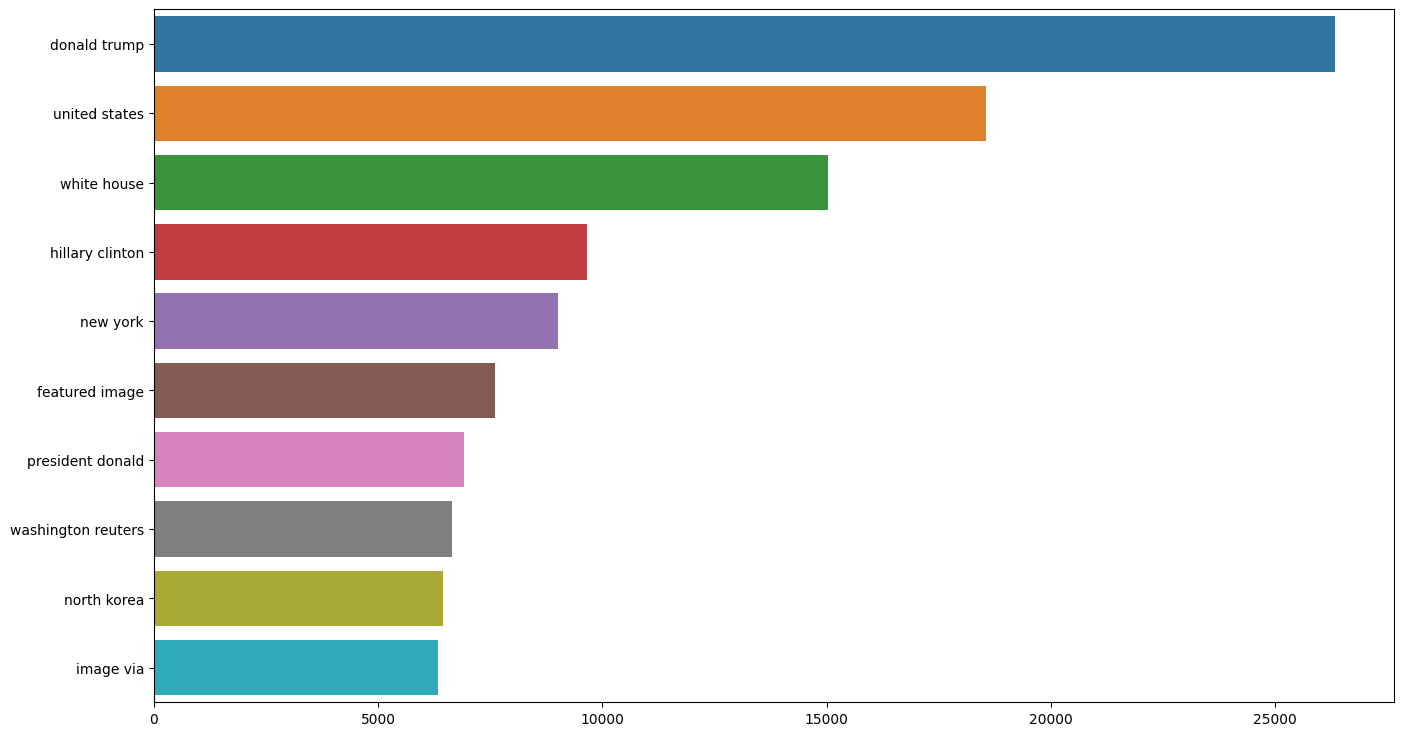

In [54]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(news_after_make_concate.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.show()

In [55]:
news_after_make_concate.head(n = 10).style.background_gradient(cmap = "summer")

In [56]:
news_after_make_concate.tail(n = 10).style.background_gradient(cmap = "summer")

In [57]:
x = news_after_make_concate["text"]
y = news_after_make_concate["news_class"]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 11)

In [58]:
print("shape of the train data:",x_train.shape)
print("shape of the test data:",x_test.shape)

shape of the train data: (35743,)
shape of the test data: (8936,)
